In [1]:
import pandas as pd
import os
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib import pyplot
from plot_cdf import plot_cdf

## Look at outputs of ./gym

In [2]:
path_files = "outputs/"
files = os.listdir(path_files)
files

['out_5G_12mbps.txt',
 'out_main2.txt',
 'trace_example_duration_3000_output.txt',
 'trace_200k_duration_3000_output.txt',
 '5G_12mbps_dur_30000_lo_02.txt',
 '5G_12mbps_duration_3000_output.txt',
 'out_main4.txt',
 'out_main3.txt',
 'out_main.txt',
 'out_trace_300k.txt']

In [5]:
dict_df = {}
for name in (files):

    with open(os.path.join(path_files, name), "r") as f:
        a = []
        for line in f:
            if line.startswith("{"):
                a.append(json.loads(line))
                
    dict_df[name] = pd.DataFrame(a)

In [6]:
(dict_df['out_main.txt'] == dict_df['out_main2.txt']).all()

arrival_time_ms    True
header_length      True
padding_length     True
payload_size       True
payload_type       True
send_time_ms       True
sequence_number    True
ssrc               True
dtype: bool

In [34]:
len(dict_df['out_trace_300k.txt']), len(dict_df["out_main4.txt"])

(79, 79)

In [11]:
df_packets = dict_df['out_main2.txt']
df_packets

arrival_time_ms  header_length  padding_length  payload_size  \
0                139             24               0          1389   
1                143             24               0          1390   
2                147             24               0          1390   
3                150             24               0          1390   
4                154             24               0          1390   
..               ...            ...             ...           ...   
437             4943             24               0          1390   
438             4947             24               0          1390   
439             4974             24               0          1389   
440             4978             24               0          1390   
441             4982             24               0          1390   

     payload_type  send_time_ms  sequence_number      ssrc  
0             126            35                1  12648429  
1             126            35                2  12648429  
2             126            40                3  12648429  
3             126            45                4  12648429  
4             126            50                5  12648429  
..            ...           ...              ...       ...  
437           126          4835              438  12648429  
438           126          4840              439  12648429  
439           126          4870              440  12648429  
440           126          4870              441  12648429  
441           126          4875              442  12648429  

[442 rows x 8 columns]

In [12]:
df_packets.ssrc.unique()

array([12648429])

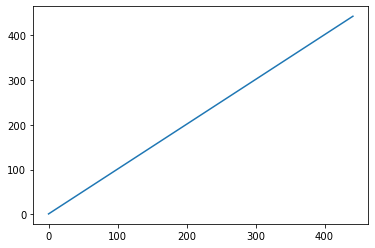

In [13]:
df_packets[df_packets.ssrc == 12648429].sequence_number.plot()

In [14]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
to_plot = df["arrival_time_ms"].diff().dropna()

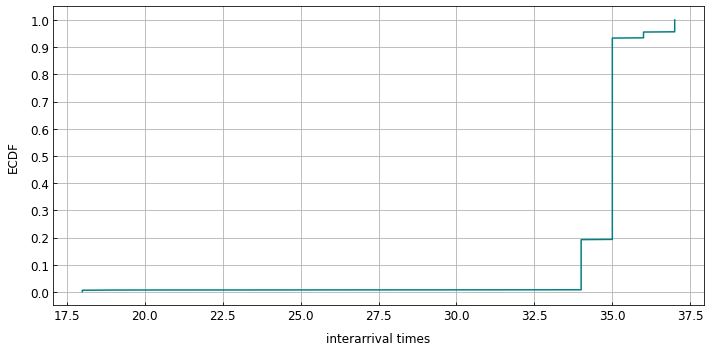

In [40]:
plot_cdf(to_plot, "interarrival times")

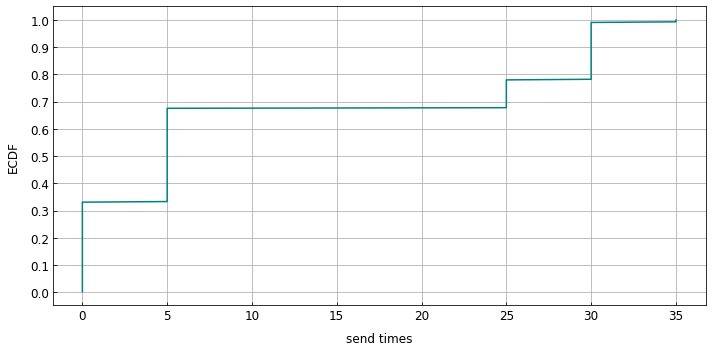

In [16]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
to_plot = df["send_time_ms"].diff().dropna()

plot_cdf(to_plot, "send times")

In [21]:
to_plot.mean()

10.975056689342404

In [19]:
5000/11

454.54545454545456

## Calculate receiving rate from packet list

In [10]:
def calculate_rate_from_packet_list(df_packets, interval=100):
    #calculates rate for given packet list df_packets for given interval for the first ssrc
    
    ssrc = df_packets["ssrc"].unique()[0]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
    df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
    df = df.set_index("arrival_time_ms")
    
    def calculate_rate(series):
#         interval = 100
        return (series.sum() * 8 * 1000 )/ interval

    receiving_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
    
    return receiving_rate_series

In [14]:
df_packets = dict_df['trace_example_duration_3000_output.txt']
calculate_rate_from_packet_list(df_packets, 60)

payload_size
arrival_time_ms                       
1970-01-01 00:00:00.120  185200.000000
1970-01-01 00:00:00.180  185333.333333
1970-01-01 00:00:00.240  185333.333333
1970-01-01 00:00:00.300  185333.333333
1970-01-01 00:00:00.360  185333.333333
1970-01-01 00:00:00.420  185333.333333
1970-01-01 00:00:00.480  185333.333333
1970-01-01 00:00:00.540  185333.333333
1970-01-01 00:00:00.600       0.000000
1970-01-01 00:00:00.660  185333.333333
1970-01-01 00:00:00.720  185333.333333
1970-01-01 00:00:00.780  185333.333333
1970-01-01 00:00:00.840  185333.333333
1970-01-01 00:00:00.900  185333.333333
1970-01-01 00:00:00.960  185333.333333
1970-01-01 00:00:01.020  184800.000000
1970-01-01 00:00:01.080  138933.333333
1970-01-01 00:00:01.140  278000.000000
1970-01-01 00:00:01.200  139066.666667
1970-01-01 00:00:01.260  138933.333333
1970-01-01 00:00:01.320  139066.666667
1970-01-01 00:00:01.380  138933.333333
1970-01-01 00:00:01.440  278000.000000
1970-01-01 00:00:01.500  139066.666667
1970-01-01 00:00:01.560  138933.333333
1970-01-01 00:00:01.620  139066.666667
1970-01-01 00:00:01.680  278000.000000
1970-01-01 00:00:01.740  138933.333333
1970-01-01 00:00:01.800  139066.666667
1970-01-01 00:00:01.860  185200.000000
1970-01-01 00:00:01.920  185333.333333
1970-01-01 00:00:01.980  185333.333333
1970-01-01 00:00:02.040  185200.000000
1970-01-01 00:00:02.100  185333.333333
1970-01-01 00:00:02.160  185333.333333
1970-01-01 00:00:02.220       0.000000
1970-01-01 00:00:02.280  185200.000000
1970-01-01 00:00:02.340  185333.333333
1970-01-01 00:00:02.400  185333.333333
1970-01-01 00:00:02.460  185200.000000
1970-01-01 00:00:02.520  185333.333333
1970-01-01 00:00:02.580  185333.333333
1970-01-01 00:00:02.640  185200.000000
1970-01-01 00:00:02.700  185333.333333
1970-01-01 00:00:02.760  185333.333333
1970-01-01 00:00:02.820  185200.000000
1970-01-01 00:00:02.880  185333.333333
1970-01-01 00:00:02.940  185333.333333

### Making the code for "calculate_rate_from_packet_list"

In [9]:
df_packets = dict_df['trace_example_duration_3000_output.txt']
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
df

arrival_time_ms  header_length  padding_length  payload_size  \
0               144             24               0          1389   
1               209             24               0          1390   
2               273             24               0          1390   
3               338             24               0          1390   
4               402             24               0          1390   
5               467             24               0          1390   
6               531             24               0          1390   
7               596             24               0          1390   
8               660             24               0          1390   
9               725             24               0          1390   
10              789             24               0          1390   
11              854             24               0          1390   
12              918             24               0          1390   
13              983             24               0          1390   
14             1047             28               0          1386   
15             1096             24               0          1042   
16             1146             24               0          1043   
17             1194             24               0          1042   
18             1244             24               0          1043   
19             1293             24               0          1042   
20             1342             24               0          1043   
21             1391             24               0          1042   
22             1440             24               0          1043   
23             1489             24               0          1042   
24             1538             24               0          1043   
25             1587             24               0          1042   
26             1636             24               0          1043   
27             1685             24               0          1042   
28             1734             24               0          1043   
29             1783             24               0          1042   
30             1832             24               0          1043   
31             1896             24               0          1389   
32             1961             24               0          1390   
33             2025             24               0          1390   
34             2090             24               0          1389   
35             2154             24               0          1390   
36             2219             24               0          1390   
37             2283             24               0          1389   
38             2348             24               0          1390   
39             2412             24               0          1390   
40             2477             24               0          1389   
41             2541             24               0          1390   
42             2606             24               0          1390   
43             2670             24               0          1389   
44             2735             24               0          1390   
45             2799             24               0          1390   
46             2867             24               0          1389   
47             2932             24               0          1390   
48             2996             24               0          1390   

    payload_type  send_time_ms  sequence_number      ssrc  
0            126            35                1  12648429  
1            126            35                2  12648429  
2            126            40                3  12648429  
3            126            45                4  12648429  
4            126            50                5  12648429  
5            126            55                6  12648429  
6            126            60                7  12648429  
7            126            65                8  12648429  
8            126            70                9  12648429  
9  

In [41]:
df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
df = df.set_index("arrival_time_ms")
df

arrival_time_ms  header_length  padding_length  \
send_time_ms                                                              
1970-01-01 00:00:00.035              139             24               0   
1970-01-01 00:00:00.035              143             24               0   
1970-01-01 00:00:00.040              147             24               0   
1970-01-01 00:00:00.045              150             24               0   
1970-01-01 00:00:00.050              154             24               0   
...                                  ...            ...             ...   
1970-01-01 00:00:04.835             4943             24               0   
1970-01-01 00:00:04.840             4947             24               0   
1970-01-01 00:00:04.870             4974             24               0   
1970-01-01 00:00:04.870             4978             24               0   
1970-01-01 00:00:04.875             4982             24               0   

                         payload_size  payload_type  sequence_number      ssrc  
send_time_ms                                                                    
1970-01-01 00:00:00.035          1389           126                1  12648429  
1970-01-01 00:00:00.035          1390           126                2  12648429  
1970-01-01 00:00:00.040          1390           126                3  12648429  
1970-01-01 00:00:00.045          1390           126                4  12648429  
1970-01-01 00:00:00.050          1390           126                5  12648429  
...                               ...           ...              ...       ...  
1970-01-01 00:00:04.835          1390           126              438  12648429  
1970-01-01 00:00:04.840          1390           126              439  12648429  
1970-01-01 00:00:04.870          1389           126              440  12648429  
1970-01-01 00:00:04.870          1390           126              441  12648429  
1970-01-01 00:00:04.875          1390           126              442  12648429  

[442 rows x 7 columns]

In [59]:
interval = 100 #ms

def calculate_rate(series):
    interval = 100
    return (series.sum() * 8 * 1000 )/ interval

In [61]:
receiving_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
receiving_rate_series

payload_size
send_time_ms                         
1970-01-01 00:00:00.000       1667600
1970-01-01 00:00:00.100        667200
1970-01-01 00:00:00.200        500400
1970-01-01 00:00:00.300        833840
1970-01-01 00:00:00.400       1000560
1970-01-01 00:00:00.500       1000560
1970-01-01 00:00:00.600       1000560
1970-01-01 00:00:00.700       1000560
1970-01-01 00:00:00.800       1000560
1970-01-01 00:00:00.900       1000560
1970-01-01 00:00:01.000       1000560
1970-01-01 00:00:01.100       1000560
1970-01-01 00:00:01.200       1000560
1970-01-01 00:00:01.300       1000560
1970-01-01 00:00:01.400       1000560
1970-01-01 00:00:01.500       1000560
1970-01-01 00:00:01.600       1000560
1970-01-01 00:00:01.700       1000560
1970-01-01 00:00:01.800       1000560
1970-01-01 00:00:01.900       1000560
1970-01-01 00:00:02.000       1000560
1970-01-01 00:00:02.100       1000560
1970-01-01 00:00:02.200       1000560
1970-01-01 00:00:02.300       1000560
1970-01-01 00:00:02.400       1000560
1970-01-01 00:00:02.500       1000560
1970-01-01 00:00:02.600       1000560
1970-01-01 00:00:02.700       1000560
1970-01-01 00:00:02.800       1000560
1970-01-01 00:00:02.900       1000560
1970-01-01 00:00:03.000       1000560
1970-01-01 00:00:03.100       1000560
1970-01-01 00:00:03.200       1000560
1970-01-01 00:00:03.300       1000560
1970-01-01 00:00:03.400       1000560
1970-01-01 00:00:03.500       1000560
1970-01-01 00:00:03.600       1000560
1970-01-01 00:00:03.700       1000560
1970-01-01 00:00:03.800       1000560
1970-01-01 00:00:03.900       1000560
1970-01-01 00:00:04.000       1000560
1970-01-01 00:00:04.100       1000560
1970-01-01 00:00:04.200       1000560
1970-01-01 00:00:04.300       1000560
1970-01-01 00:00:04.400       1000560
1970-01-01 00:00:04.500       1000560
1970-01-01 00:00:04.600       1000560
1970-01-01 00:00:04.700       1000560
1970-01-01 00:00:04.800       1000560

## Look at list of received packets

In [2]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

In [5]:
print(l_packets[0][0]["trace"])
print(len(l_packets[0][0]["list_of_packets"]))

/home/dena/Documents/Gym_RTC/gym-example/traces/trace_loss_pattern_3.json
53


In [6]:
df_packets = pd.DataFrame(l_packets[0][0]["list_of_packets"])
df_packets

arrival_time_ms  header_length  padding_length  payload_size  \
0                47             24               0          1396   
1                58             24               0          1397   
2                72             24               0          1397   
3                83             24               0          1397   
4                97             28               0          1393   
5               106             24               0           699   
6               112             24               0           699   
7               140             24               0           544   
8               175             24               0           544   
9               210             24               0           544   
10              241             24               0           747   
11              276             24               0           747   
12              311             24               0           747   
13              338             24               0           317   
14              375             24               0           627   
15              410             24               0           633   
16              442             24               0           844   
17              449             24               0           845   
18              477             24               0           844   
19              484             24               0           845   
20              512             24               0           844   
21              519             24               0           845   
22              545             24               0          1184   
23              580             24               0          1184   
24              677             24               0           831   
25              695             24               0          1186   
26              707             24               0           833   
27              740             24               0           617   
28              757             24               0           833   
29              775             24               0           617   
30              810             24               0           617   
31              841             24               0           686   
32              876             24               0           686   
33              911             24               0           686   
34              942             24               0           771   
35              977             24               0           771   
36             1012             24               0           771   
37             1043             24               0           938   
38             1078             24               0           938   
39             1113             24               0           938   
40             1146             24               0          1299   
41             1181             24               0          1299   
42             1216             24               0          1299   
43             1241             24               0           718   
44             1247             24               0           719   
45             1276             24               0           718   
46             1282             24               0           719   
47             1311             24               0           718   
48             1317             24               0           719   
49             1342             24               0           863   
50             1377             24               0           863   
51             1412             24               0           863   
52             1446             24               0          1295   

    payload_type  send_time_ms  sequence_number       ssrc  
0            126            35                1   12648429  
1            126            45                2   12648429  
2            126            60                3   12648429  
3            126            70                4   12648429  
4            126          

In [9]:
def test_one_ssrc(l_packets, num_episodes, num_epochs_per_episode):
    for episode in range(num_episodes):
        for epoch in range(num_epochs_per_episode):
            if len(pd.DataFrame(l_packets[episode][epoch]["list_of_packets"]).ssrc.unique()) > 1:
                print(f"More than one ssrc in episode {episode} epoch {epoch}")
            else:
                print("All fine")

In [10]:
test_one_ssrc(l_packets, 1, 4)

More than one ssrc in episode 0 epoch 0
More than one ssrc in episode 0 epoch 1
More than one ssrc in episode 0 epoch 2
More than one ssrc in episode 0 epoch 3


In [11]:
df1 = pd.DataFrame(l_packets[0][0]["list_of_packets"])
df1

arrival_time_ms  header_length  padding_length  payload_size  \
0                47             24               0          1396   
1                58             24               0          1397   
2                72             24               0          1397   
3                83             24               0          1397   
4                97             28               0          1393   
5               106             24               0           699   
6               112             24               0           699   
7               140             24               0           544   
8               175             24               0           544   
9               210             24               0           544   
10              241             24               0           747   
11              276             24               0           747   
12              311             24               0           747   
13              338             24               0           317   
14              375             24               0           627   
15              410             24               0           633   
16              442             24               0           844   
17              449             24               0           845   
18              477             24               0           844   
19              484             24               0           845   
20              512             24               0           844   
21              519             24               0           845   
22              545             24               0          1184   
23              580             24               0          1184   
24              677             24               0           831   
25              695             24               0          1186   
26              707             24               0           833   
27              740             24               0           617   
28              757             24               0           833   
29              775             24               0           617   
30              810             24               0           617   
31              841             24               0           686   
32              876             24               0           686   
33              911             24               0           686   
34              942             24               0           771   
35              977             24               0           771   
36             1012             24               0           771   
37             1043             24               0           938   
38             1078             24               0           938   
39             1113             24               0           938   
40             1146             24               0          1299   
41             1181             24               0          1299   
42             1216             24               0          1299   
43             1241             24               0           718   
44             1247             24               0           719   
45             1276             24               0           718   
46             1282             24               0           719   
47             1311             24               0           718   
48             1317             24               0           719   
49             1342             24               0           863   
50             1377             24               0           863   
51             1412             24               0           863   
52             1446             24               0          1295   

    payload_type  send_time_ms  sequence_number       ssrc  
0            126            35                1   12648429  
1            126            45                2   12648429  
2            126            60                3   12648429  
3            126            70                4   12648429  
4            126          

In [12]:
df1.ssrc.unique()

array([ 12648429, 195939069])

In [17]:
pd.DataFrame(df1[df1.ssrc == df1.ssrc.unique()[0]])

arrival_time_ms  header_length  padding_length  payload_size  \
0                47             24               0          1396   
1                58             24               0          1397   
2                72             24               0          1397   
3                83             24               0          1397   
4                97             28               0          1393   
5               106             24               0           699   
6               112             24               0           699   
7               140             24               0           544   
8               175             24               0           544   
9               210             24               0           544   
10              241             24               0           747   
11              276             24               0           747   
12              311             24               0           747   
13              338             24               0           317   
14              375             24               0           627   
15              410             24               0           633   
16              442             24               0           844   
17              449             24               0           845   
18              477             24               0           844   
19              484             24               0           845   
20              512             24               0           844   
21              519             24               0           845   
22              545             24               0          1184   
23              580             24               0          1184   
24              677             24               0           831   
27              740             24               0           617   
29              775             24               0           617   
30              810             24               0           617   
31              841             24               0           686   
32              876             24               0           686   
33              911             24               0           686   
34              942             24               0           771   
35              977             24               0           771   
36             1012             24               0           771   
37             1043             24               0           938   
38             1078             24               0           938   
39             1113             24               0           938   
40             1146             24               0          1299   
41             1181             24               0          1299   
42             1216             24               0          1299   
43             1241             24               0           718   
44             1247             24               0           719   
45             1276             24               0           718   
46             1282             24               0           719   
47             1311             24               0           718   
48             1317             24               0           719   
49             1342             24               0           863   
50             1377             24               0           863   
51             1412             24               0           863   
52             1446             24               0          1295   

    payload_type  send_time_ms  sequence_number      ssrc  
0            126            35                1  12648429  
1            126            45                2  12648429  
2            126            60                3  12648429  
3            126            70                4  12648429  
4            126            85                5  12648429  
5            126           100                6  12648429  
6            126           105                7  12648429  
7            126           135                8  126484

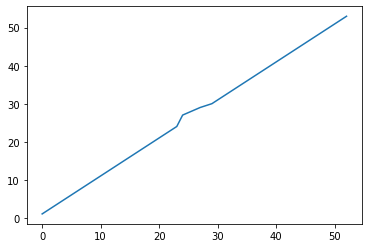

In [13]:
pd.DataFrame(df1[df1.ssrc == df1.ssrc.unique()[0]]).sequence_number.plot()

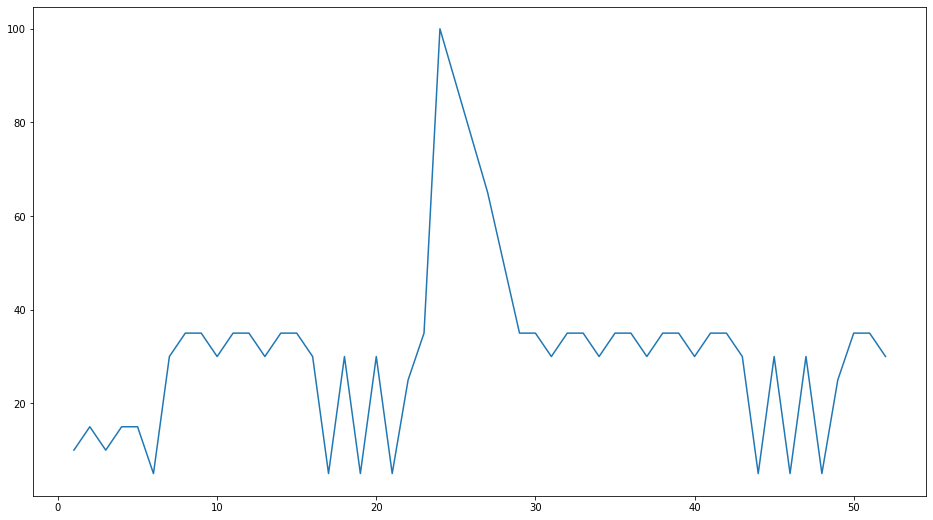

In [14]:
pd.DataFrame(df1[df1.ssrc == df1.ssrc.unique()[0]]).send_time_ms.diff().plot(figsize=(16,9))

In [11]:
pd.DataFrame(l_packets[0][3]["list_of_packets"])

arrival_time_ms  header_length  padding_length  payload_size  \
0                46             24               0          1377   
1                61             24               0          1377   
2                76             24               0          1377   
3                96             28               0          1373   
4               105             24               0           551   
5               110             24               0           551   
6               139             24               0           499   
7               174             24               0           499   
8               209             24               0           499   
9               240             24               0           601   
10              275             24               0           601   
11              310             24               0           601   
12              346             24               0          1351   
13              381             24               0          1357   
14              416             24               0          1357   
15              442             24               0           782   
16              477             24               0           782   
17              512             24               0           782   
18              543             24               0           891   
19              550             24               0           892   
20              578             24               0           891   
21              620             24               0           892   
22              638             24               0           894   
23              645             24               0           893   
24              681             24               0          1275   
25              701             24               0          1277   
26              716             24               0          1275   
27              746             24               0          1327   
28              781             24               0          1327   
29              816             24               0          1327   
30              843             24               0           944   
31              878             24               0           944   
32              913             24               0           944   
33              939             24               0           472   
34              974             24               0           472   
35             1009             24               0           472   
36             1041             24               0           642   
37             1076             24               0           642   
38             1111             24               0           642   
39             1146             24               0          1327   
40             1181             24               0          1327   
41             1216             24               0          1327   
42             1242             24               0           851   
43             1277             24               0           851   
44             1312             24               0           851   
45             1342             24               0           805   
46             1349             24               0           805   
47             1377             24               0           805   
48             1384             24               0           805   
49             1412             24               0           805   
50             1419             24               0           805   
51             1443             24               0           934   
52             1478             24               0           934   
53             1486             24               0           934   
54             1494             24               0           936   

    payload_type  send_time_ms  sequence_number       ssrc  
0            126            35                1   12648429  
1            126            50                2   12648429  
2           

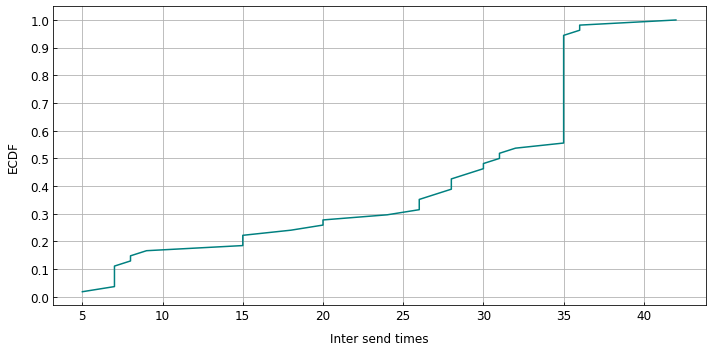

In [12]:
to_plot = pd.DataFrame(l_packets[0][3]["list_of_packets"]).arrival_time_ms.diff().dropna()
plot_cdf(to_plot, "Inter send times")
# pyplot.xscale('log')

## Plot CDF of packet interarrivals per epoch per ssrc

In [39]:
len(l_packets[0])

250

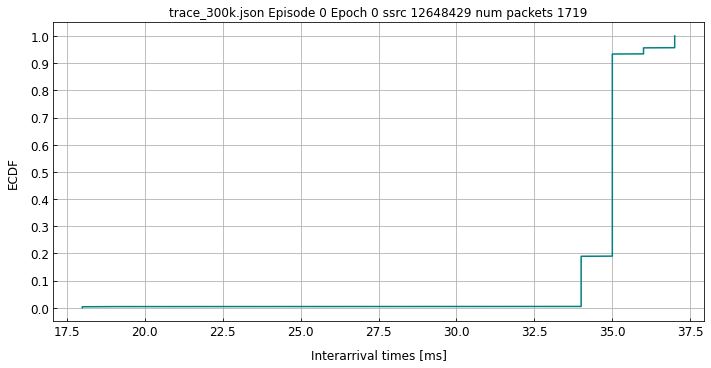

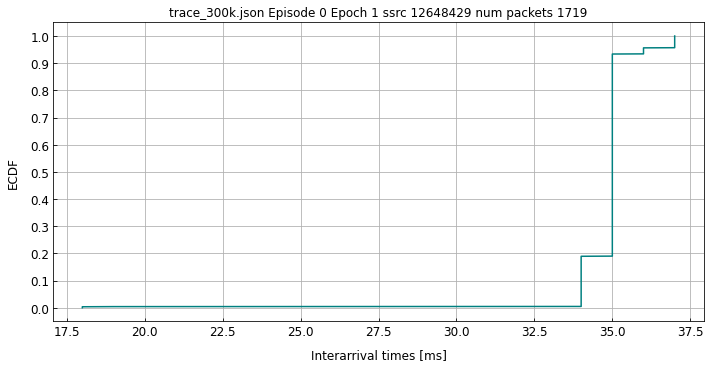

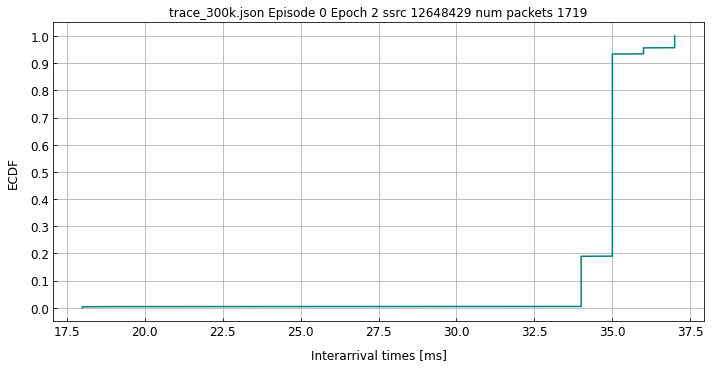

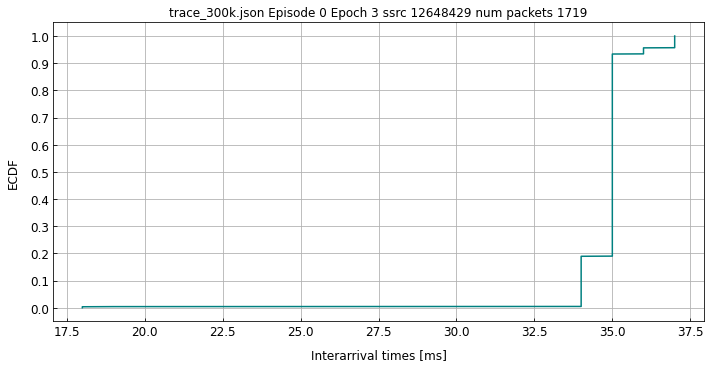

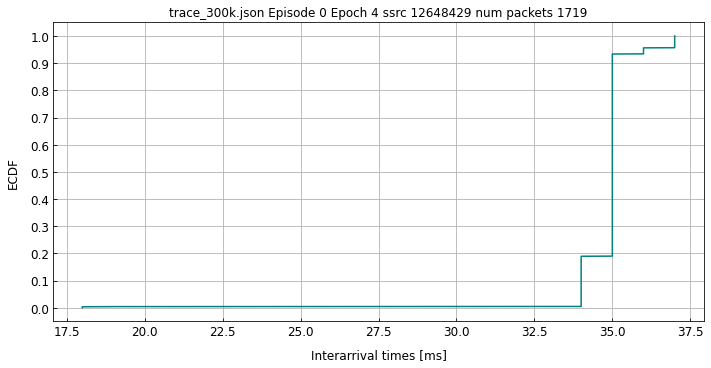

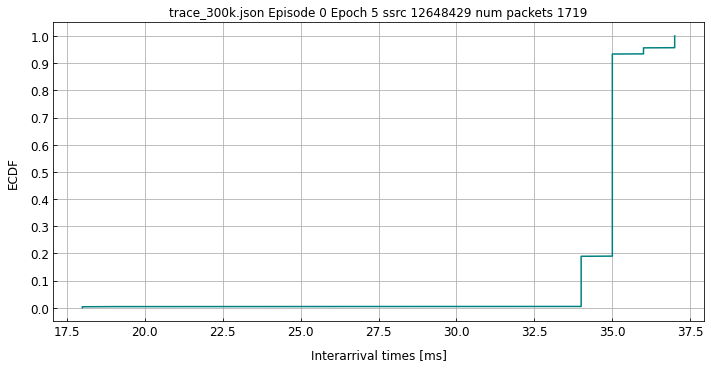

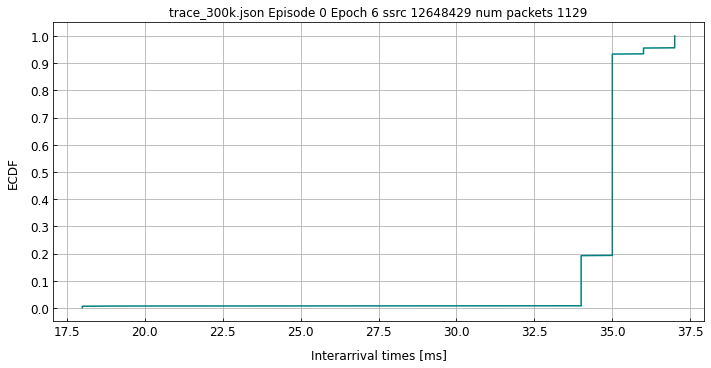

In [15]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

time_step = 100
max_num_episodes = 1
to_plot_big = []

for episode in range(max_num_episodes):
    num_epochs = len(l_packets[episode])
    for epoch in range(num_epochs)[:10]:
        trace_file = l_packets[episode][epoch]["trace"].split("/")[-1]
        df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])

        for i in range(len(df_packets.ssrc.unique())):
            ssrc = df_packets["ssrc"].unique()[i]
            df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
            to_plot = df["arrival_time_ms"].diff().dropna()
            
            #Plot only flows with more than 10 packets
            if len(df) >= 10:
                
                plot_cdf(to_plot, "Interarrival times [ms]")
                plt.title(f"{trace_file} Episode {episode} Epoch {epoch} ssrc {ssrc} num packets {len(df)}")
                
            to_plot_big.append(to_plot)
    

(0.0, 100.0)

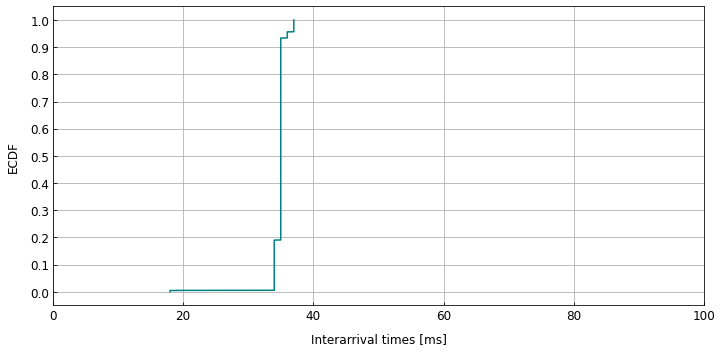

In [16]:
to_plot_big = [item for sublist in to_plot_big for item in sublist]
plot_cdf(to_plot_big, "Interarrival times [ms]")
plt.xlim(0,100)

In [17]:
df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])
df_packets

arrival_time_ms  header_length  padding_length  payload_size  \
0                 112             24               0          1251   
1                 147             24               0          1252   
2                 182             24               0          1252   
3                 217             24               0          1252   
4                 252             28               0          1248   
...               ...            ...             ...           ...   
1124            39232             24               0          1251   
1125            39267             24               0          1251   
1126            39302             24               0          1251   
1127            39337             24               0          1251   
1128            39373             24               0          1251   

      payload_type  send_time_ms  sequence_number      ssrc  
0              126            35                1  12648429  
1              126            45                2  12648429  
2              126            60                3  12648429  
3              126            75                4  12648429  
4              126            85                5  12648429  
...            ...           ...              ...       ...  
1124           126         37369             1125  12648429  
1125           126         37404             1126  12648429  
1126           126         37434             1127  12648429  
1127           126         37469             1128  12648429  
1128           126         37504             1129  12648429  

[1129 rows x 8 columns]